# Airbnb in Seattle 

**1. Importer les librairies et les deux datasets**

In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
reviews = pd.read_csv('reviews.csv')
listings = pd.read_csv("listings.csv")

**2. Trouver un moyen de joindre le dataset `listings` & `reviews`**

In [6]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [7]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [8]:
dataset = listings.merge(reviews, left_on ="id", right_on="listing_id")

In [9]:
dataset.head()

,id_x,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,listing_id,id_y,date,reviewer_id,reviewer_name,comments
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,f,2,4.07,241032,682061,2011-11-01,479824,Bro,Excellent all the way around. \n\nMaija was an...
1,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,f,2,4.07,241032,691712,2011-11-04,357699,Megan,Maija's apartment was a wonderful place to sta...
2,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,f,2,4.07,241032,702999,2011-11-08,1285567,Marylee,one of the most pleasant stays i've had in my ...
3,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,f,2,4.07,241032,717262,2011-11-14,647857,Graham,"Maija's suite is beautiful, cozy and convenien..."
4,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,f,2,4.07,241032,730226,2011-11-19,1389821,Franka,Our stay was short and pleasant. With its own ...


In [10]:
dataset.shape

(84849, 98)

**3. Essayons de voir ce qui influence le prix d'un appartement Airbnb à Seattle** 

**Regardez tout d'abord la distribution des prix** 

In [11]:
dataset.price

0         $85.00
1         $85.00
2         $85.00
3         $85.00
4         $85.00
          ...   
84844     $95.00
84845     $95.00
84846    $359.00
84847     $79.00
84848     $79.00
Name: price, Length: 84849, dtype: object

In [12]:
dataset.price = dataset.price.apply(lambda x: float(x[1:].replace(",","")))
#dataset.price = dataset.price.str.replace("$","").str.replace(",","").astype(float)

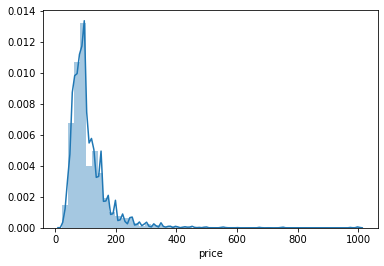

In [13]:
sns.distplot(dataset.price)

**4. On voit très clairement des outliers dans ces prix. Créez un nouveau dataset avec uniquement les appartements qui ont un prix maximum à 400$ / nuit**

In [14]:
avg_priced_dataset = dataset[dataset.price <= 400]

In [15]:
avg_priced_dataset.describe()

,id_x,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month,listing_id,id_y,reviewer_id
count,8.427600e+04,8.427600e+04,8.427600e+04,84276.000000,84276.000000,84276.000000,84276.000000,84276.000000,83667.000000,83986.000000,...,84243.000000,84252.000000,84246.000000,84245.000000,0.0,84276.000000,84276.000000,8.427600e+04,8.427600e+04,8.427600e+04
mean,3.000882e+06,2.016010e+13,9.285215e+06,4.142567,4.142567,47.626526,-122.333485,3.070127,1.157213,1.133713,...,9.865247,9.870769,9.599269,9.501941,NaN,2.273969,3.624716,3.000882e+06,3.057100e+07,1.701100e+07
std,2.472995e+06,4.114087e+01,1.017225e+07,14.219709,14.219709,0.042949,0.031303,1.676846,0.438961,0.667682,...,0.369126,0.359835,0.545658,0.567287,NaN,3.437275,2.186954,2.472995e+06,1.637916e+07,1.354158e+07
min,4.291000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000,4.291000e+03,3.721000e+03,1.500000e+01
25%,7.946330e+05,2.016010e+13,1.393266e+06,1.000000,1.000000,47.606737,-122.356266,2.000000,1.000000,1.000000,...,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,1.940000,7.946330e+05,1.722488e+07,5.045034e+06
50%,2.488228e+06,2.016010e+13,5.486995e+06,1.000000,1.000000,47.621627,-122.329441,2.000000,1.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,3.290000,2.488228e+06,3.225987e+07,1.413230e+07
75%,4.681885e+06,2.016010e+13,1.378638e+07,3.000000,3.000000,47.661991,-122.311762,4.000000,1.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,4.940000,4.681885e+06,4.458225e+07,2.762409e+07
max,1.024814e+07,2.016010e+13,5.076344e+07,502.000000,502.000000,47.733358,-122.254189,16.000000,8.000000,7.000000,...,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000,1.024814e+07,5.873651e+07,5.281274e+07


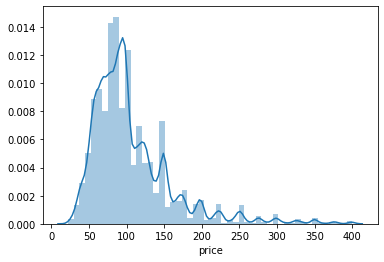

In [16]:
sns.distplot(avg_priced_dataset.price)

**5. Calculez la proportion d'appartement que vous avez gardé dans le nouveau dataset par rapport à l'ancien**

In [17]:
len(avg_priced_dataset)/len(dataset)

0.993246826715695

**6. Pour l'instant nous allons continuer sur ce dataset qui nous semble plus pertinent** 

**Regardez si le quartier a une influence sur les prix. On utilisera la colonne *neighbourhood_group_cleansed***

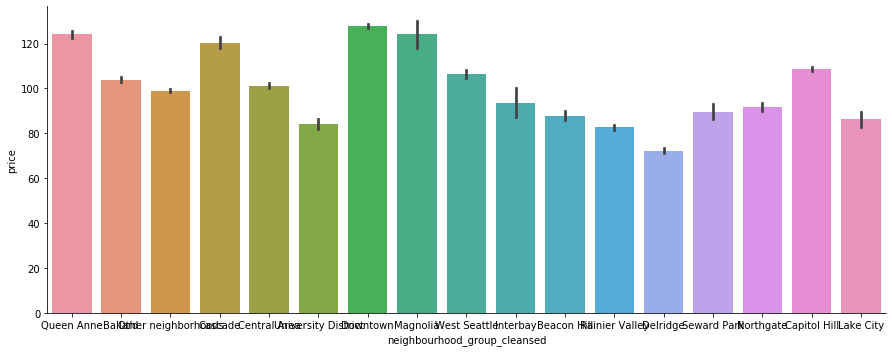

In [18]:
sns.catplot(x="neighbourhood_group_cleansed", y="price", data= avg_priced_dataset, kind="bar", height=5, aspect=2.5)

**Regardez de même avec le type de propriété**

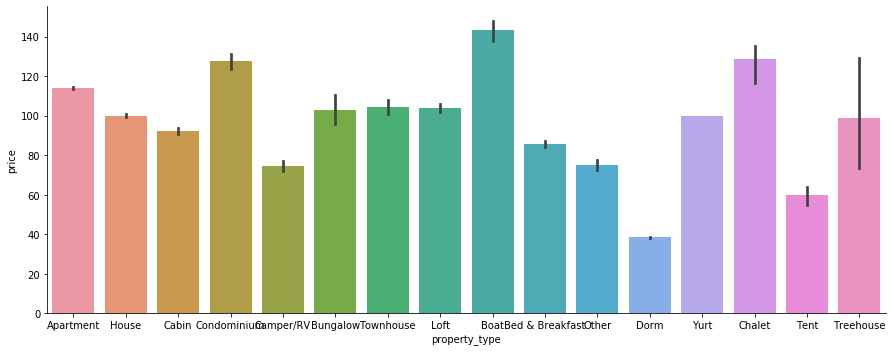

In [19]:
sns.catplot(x="property_type", y="price", data=avg_priced_dataset, kind="bar", height=5, aspect=2.5)

**Regardez cette fois les prix par rapport au type de chambre**

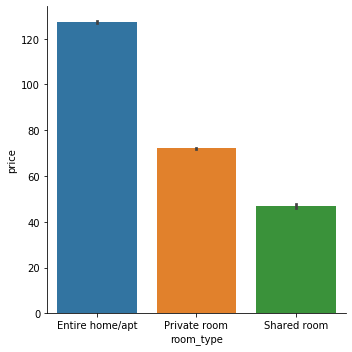

In [20]:
sns.catplot(x="room_type", y="price", data=avg_priced_dataset, kind="bar")

**On pourrait se demander si le temps de réponse du _Host_ aurait une influence sur le prix. Vérifiez le**

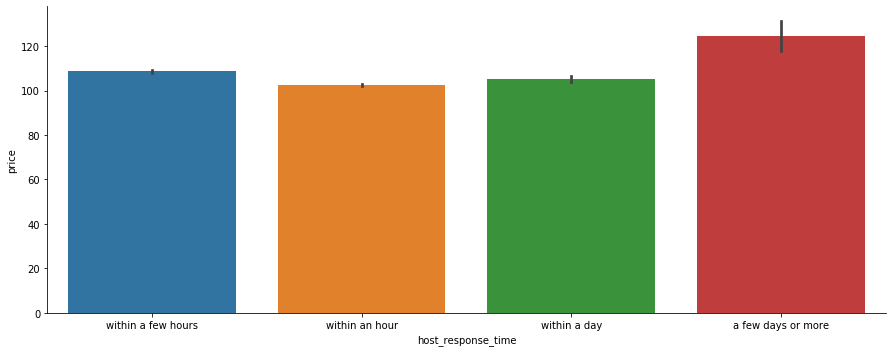

In [21]:
sns.catplot(x="host_response_time", y="price", data=avg_priced_dataset, kind="bar",height=5, aspect=2.5)

**Ce graphique semble être intéressant et surtout. Regardez de plus près la distribution des prix des _host_ qui répondent _within few days or more_**

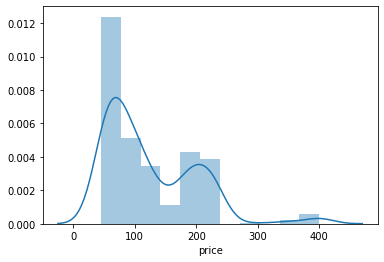

In [22]:
sns.distplot(avg_priced_dataset["price"][avg_priced_dataset["host_response_time"] == "a few days or more"])
#On applique un masque grâce à avg_priced_dataset["host_response_time"] == "a few days or more" qui nous permet de
#sélectionner les valeurs dans la colonne "price" qui correspondent à notre condition

**Il semblerait en effet que les host qui répondent lentement soient dans la moyenne haute des prix. Cependant, cela ne veut pas dire que l'expérience des clients soit bonne. Nous regarderons les reviews juste ensuite.** 

**Avant cela, regardons l'influence du fait d'être _super host_ sur les prix**


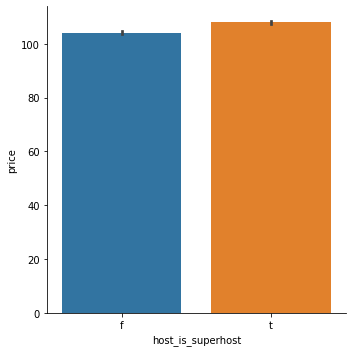

In [23]:
sns.catplot(x="host_is_superhost", y="price", data=avg_priced_dataset, kind="bar")

**Regardons cette fois l'influence de la maison en elle-même sur le prix d'un Airbnb** 

**Regardez l'influence des prix par rapport au nombre de lits, de chambres, de salles de bains et du nombre de personnes possibles dans le logement**

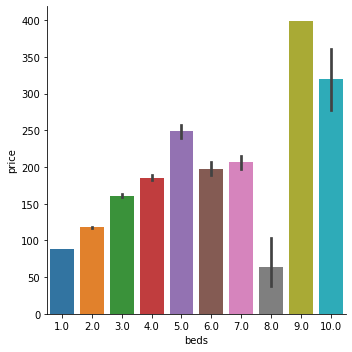

In [24]:
sns.catplot(x="beds", y="price", data=avg_priced_dataset, kind="bar")

In [25]:
avg_priced_dataset.beds.value_counts()

1.0     54830
2.0     18471
3.0      7643
4.0      2387
5.0       469
6.0       193
7.0       169
9.0        81
8.0        24
10.0        9
Name: beds, dtype: int64

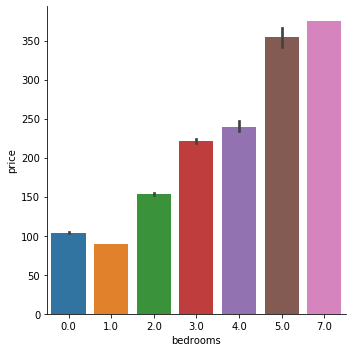

In [26]:
sns.catplot(x="bedrooms", y="price", data=avg_priced_dataset, kind="bar")

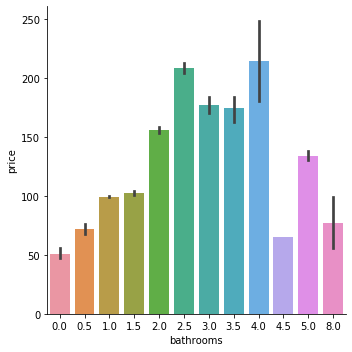

In [27]:
sns.catplot(x="bathrooms", y="price", data=avg_priced_dataset, kind="bar")

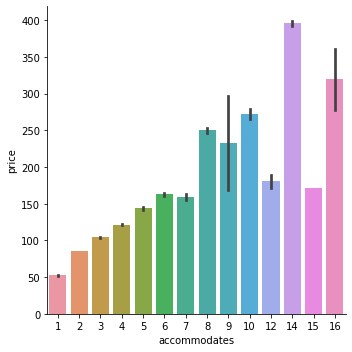

In [28]:
sns.catplot(x="accommodates", y="price", data=avg_priced_dataset, kind="bar")

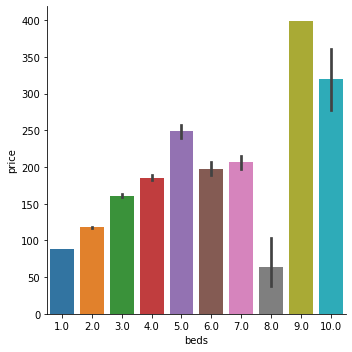

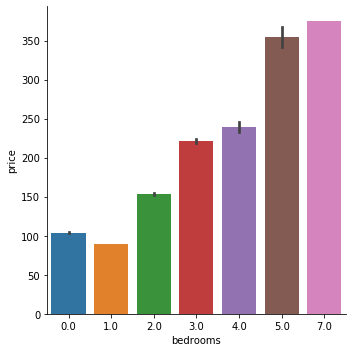

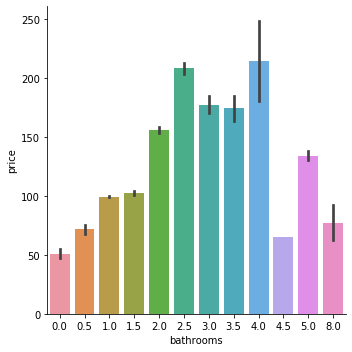

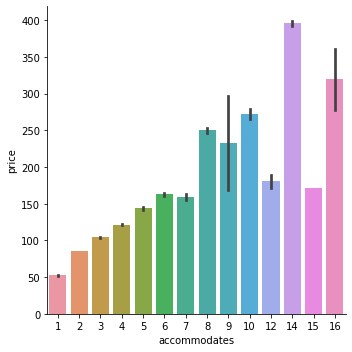

In [29]:
liste = ["beds","bedrooms","bathrooms","accommodates"]
for column in liste:
  sns.catplot(x=column, y="price", data=avg_priced_dataset, kind="bar")
  plt.show()

**Enfin, nous aimerions voir si les _amenities_ ont une influence sur le prix. Pour cela, nous ne pouvons pas utiliser les valeurs telles quelles dans le dataset. Trouvez donc un moyenne de les parser pour les mettre dans seaborn**


In [30]:
dataset.amenities.head()

0    {TV,"Cable TV",Internet,"Wireless Internet","A...
1    {TV,"Cable TV",Internet,"Wireless Internet","A...
2    {TV,"Cable TV",Internet,"Wireless Internet","A...
3    {TV,"Cable TV",Internet,"Wireless Internet","A...
4    {TV,"Cable TV",Internet,"Wireless Internet","A...
Name: amenities, dtype: object

In [31]:
avg_priced_dataset["number_of_amenities"]= avg_priced_dataset["amenities"].apply(lambda x: len(x.split(",")))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


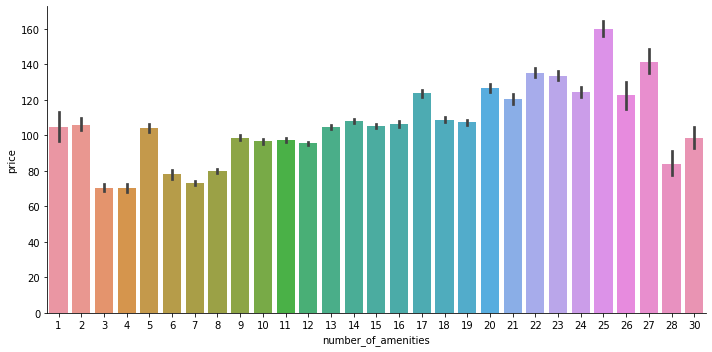

In [32]:
sns.catplot(x="number_of_amenities", y="price", data=avg_priced_dataset, kind="bar", height=5, aspect=2)

**7. Attaquons maintenant les reviews, il semblerait bon de commencer par la distribution des reviews**

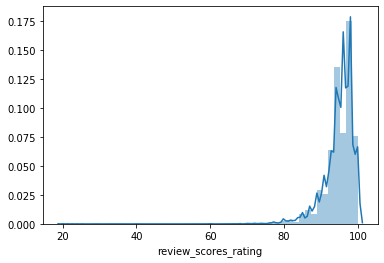

In [33]:
sns.distplot(avg_priced_dataset["review_scores_rating"].dropna())

In [34]:
print("la review moyenne du dataset est de {}".format(avg_priced_dataset["review_scores_rating"].mean()))

la review moyenne du dataset est de 94.88823480541676


**Nous avons pris la moyenne sur le dataset sans les outliers. Prenez les dataset complet et regardez si vous voyez une différence**

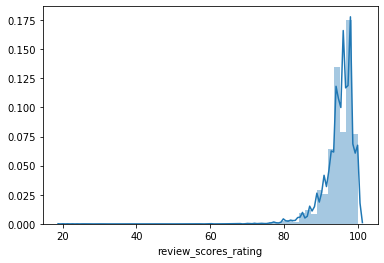

In [35]:
sns.distplot(dataset["review_scores_rating"].dropna())

In [36]:
print("la review moyenne du dataset complet est de {}".format(dataset["review_scores_rating"].mean()))

la review moyenne du dataset complet est de 94.89636798736281


**8. On peut voir que les notes sont extrêmement élevée pour la plupart des biens. Mais voyons si nous pouvons trouver des facteurs qui influencent une meilleure review**

**Commencez par regarder la *cancellation_policy* sur les reviews**

(80, 100)

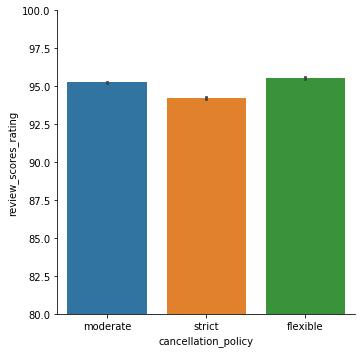

In [37]:
sns.catplot(x="cancellation_policy", y="review_scores_rating", data=avg_priced_dataset, kind="bar")
plt.ylim(80,100)

**9. Est ce que le nombre de reviews peut influencer le score de chacun des biens ?** 

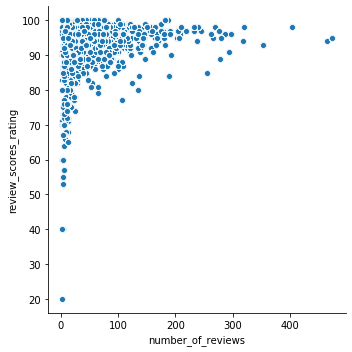

In [38]:
sns.relplot(x="number_of_reviews", y="review_scores_rating", data=avg_priced_dataset)

**10. Nous avions vu tout à l'heure que les personnes qui mettaient du temps à répondre avaient tendance à pratiquer des prix plus élevés. Est ce que pour autant ceux-ci ont des bonnes reviews ?**

(80, 100)

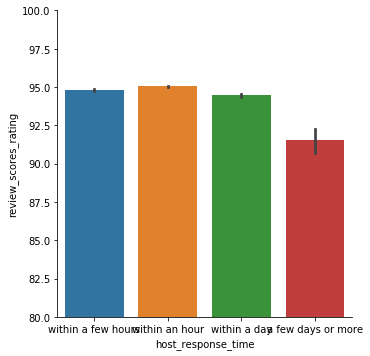

In [39]:
sns.catplot(x="host_response_time", 
            y="review_scores_rating", 
            data= avg_priced_dataset, 
            kind="bar")
plt.ylim(80, 100)

**11. Bravo ! Vous avez fait une étude très approfondie du marché de l'immobilier Airbnb à Seattle. Ceci n'a pas été vain, imaginez maintenant que vous avez été mandaté par un propriétaire qui souhaite mettre sur appartement sur Airbnb.**

**Quelles seraient vos recommandations ?**

1. Si vous souhaitez pratiquer des prix élevé, il vaudra mieux louer votre bien en entier. Il sera donc préférable de laisser votre appartement pendant que vous partez en vacances par exemple.

2. Soyez rapide lorsqu'un de vos potentiel locataire vous envoie un message. Cela est apprécié. 

3. Vous pouvez pratiquer la _cancellation policy_ que vous souhaitez, cela n'aura pas d'impact sur l'expérience de vos clients. 

4. Proposez le maximum d'amenities car vous pourrez faire monter le prix du bien. 

5. Soyez attentif au quartier dans lequel vous êtes et le type de bien que vous louez. En fonction, vous pourrez pratiquer des prix plus élevés ou plus faibles 